In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import style
import seaborn as sns
# from sklearn.tree import export_graphviz
# import graphviz

# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import GradientBoostingRegressor

# from sklearn.preprocessing import scale, minmax_scale, robust_scale

matplotlib.rc('font', family='NanumGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

In [9]:
df_member = pd.read_csv("./DataSet/master_member_sheet_001.csv", engine='python')
df_member.head(2)

,Unnamed: 0,ID,나이,사용가능 적립금,성별,주소(동/읍/면),최종접속일,최종주문일,유입경로,유입기기,회원 가입일,사업자구분,회원구분
0,0,sr7577,40대,0,남자,경기도 평택시 현신3길 76 (용이동),2016-12-30 오후 5:57,2016-12-30,블로그광고,PC,2016-12-30,개인,일반
1,1,cgh1385,50대,0,남자,전라북도 전주시 덕진구 동부대로 879 (호성동1가),2017-01-02 오후 12:32,2017-01-01 오후 3:38,블로그광고,모바일,2017-01-01,개인,일반


In [10]:
df_order = pd.read_csv("./DataSet/log_order_sheet_001.csv", engine='python')
df_order.head(2)

,Unnamed: 0,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,배송시작일,배송완료일,사용한 적립금액,...,주문자ID,카드사,쿠폰 할인금액,판매가,품목번호,친환경,사은품,회원,주문수량,총수량
0,0,무통장입금,44550.0,교환안함,0,D-20181227-0000648-00,무료,2019-01-07 오전 8:56,2019-01-11 오전 5:32,0,...,pp683,기타,0,71450,42602,False,False,True,1,300
1,1,무통장입금,44000.0,교환안함,0,D-20181229-0000119-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,...,asd0908,기타,0,70620,42930,False,False,True,2,2000


In [15]:
df_product = pd.read_csv("./DataSet/master_product_sheet_001.csv", engine='python')
df_product.head(2)

,Unnamed: 0,#,공급사,과세/면세,담기,매입가,상품명(기본),상품코드,재입고알림,카테고리,판매가,품절여부,후기
0,0,1,패커스,과세,0,55440,"실링용기 71호 백색 2,200ml 400개 1박스",2184,사용함,018 : 실링용기\n018002 : 실링용기 > 2319(2318)시리즈\n042...,77480,정상,0
1,1,2,(주)니드코,과세,0,3080,"니드코]국산제품 정식쟁반,병원식판,분식점 돈까스쟁반 업소용 화이트 항균아트쟁반 5호",2181,사용안함,002 : 주방용품\n002002 : 주방용품 > 주방용품\n046 : 주방용품/소...,4950,정상,0


## 범주형 변수 분포 확인(Pie Chart)

In [19]:
# 나이 분포

df_member["나이"].value_counts()

SNS광고      1087
블로그광고      1060
유튜브광고       944
전단지광고       861
이메일광고       607
잡지광고        503
인터넷검색       423
지인추천        389
기타          267
카카오톡광고      180
인터넷기사광고     158
신문광고         44
Name: 유입경로, dtype: int64

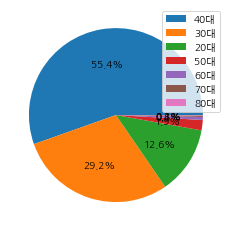

In [18]:
# labels = ['40대', '30대', '20대', '50대', '60대', '70대', '80대']
ratio = [3614, 1902, 821, 125, 36, 18, 5]
categories = ['40대', '30대', '20대', '50대', '60대', '70대', '80대']
explodes = (0.1, 0, 0)
plt.pie(ratio, autopct="%0.1f%%")
plt.legend(categories)
plt.show()

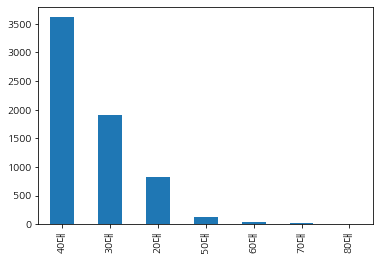

In [30]:
df_member['나이'].value_counts().plot(kind='bar')

In [22]:
# 주문경로
df_order["주문경로"].value_counts()

PC쇼핑몰     25695
모바일웹      18531
네이버 페이     2523
Name: 주문경로, dtype: int64

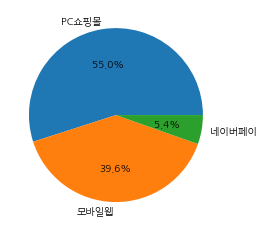

In [34]:
labels = ['PC쇼핑몰', '모바일웹', '네이버페이']
ratio = [25695, 18531, 2523]
# categories = ['40대', '30대', '20대', '50대', '60대', '70대', '80대']
explodes = (0.1, 0, 0)
plt.pie(ratio, labels=labels, autopct="%0.1f%%")
plt.show()

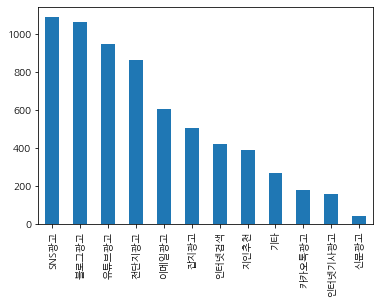

In [35]:
# 유입경로
df_member["유입경로"].value_counts().plot(kind='bar')

In [36]:
df_member["유입경로"].value_counts()

SNS광고      1087
블로그광고      1060
유튜브광고       944
전단지광고       861
이메일광고       607
잡지광고        503
인터넷검색       423
지인추천        389
기타          267
카카오톡광고      180
인터넷기사광고     158
신문광고         44
Name: 유입경로, dtype: int64

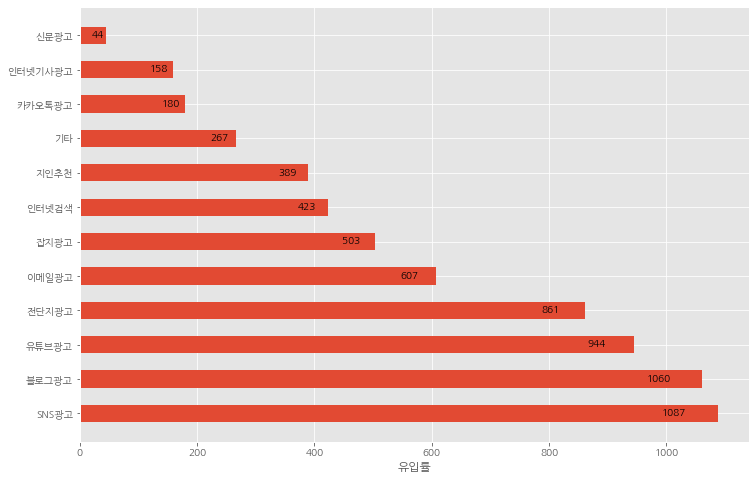

In [46]:
style.use('ggplot')

path = ['SNS광고', '블로그광고', '유튜브광고', '전단지광고', '이메일광고', '잡지광고', '인터넷검색', '지인추천', '기타', '카카오톡광고', '인터넷기사광고', '신문광고']
fluctuations = [1087, 1060, 944, 861, 607, 503, 423, 389, 267, 180, 158, 44]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

ypos = np.arange(12)
rects = plt.barh(ypos, fluctuations, align='center', height=0.5)
plt.yticks(ypos, path)

for i, rect in enumerate(rects):
    ax.text(0.95 * rect.get_width(), rect.get_y() + rect.get_height() / 2.0, str(fluctuations[i]), ha='right', va='center')

plt.xlabel('유입률')
plt.show()

In [47]:
# 카드사 분포 확인 => 너무 복잡한 것 아닌가?
df_order["카드사"].value_counts()

기타               32005
삼성                3168
신한(구.LG카드 포함)     3024
현대                2219
비씨                1887
국민                1474
NH (농협)           1116
롯데                 910
하나SK               350
외환                 236
씨티                 165
카카오뱅크               70
광주                  39
신한                  29
신협                  21
전북                  17
제주                  11
수협                   5
국내아멕스                3
Name: 카드사, dtype: int64

In [ ]:
# 인기상품 척도